# Presentation Notebook - Final Project 2: `gravity`

This notebook contains physics questions to be answered as part of the `gravity` final project - see companion assignment notebook for details.

---
---
---

# Very Important Note:

This is a __checkpoint version__ of the final project assignment.  You must submit your work in progress by __Friday, 12/7 at midnight__ to be graded as homework assignment 12.

To submit this project for grading, __move the project folder, in its entirety, into a folder called `submit_check` at the top (root) level of your file directory.__  We will manually collect the submissions at the deadline, due to a flaw in nbgrader.  __Only put one project into the `submit_check` folder.__

Your checkpoint submission will be graded on _effort_.  It is recommended that you focus on completing all functions in the API first: a solid implementation of the API will get you most of the way towards answering the physics questions at the end!

__After the checkpoint__, the final project assignment will be updated to include automated tests for the API.  You'll be asked to provide some tests of your own as well.  Otherwise, the assignment will not change from what you see below (barring small revisions for typos or mistakes, if needed.)

---
---
---

## Honor Code Pledge

Please type your name in the box below to agree to the Honor Code Pledge for this assignment:

__"On my honor, as a University of Colorado Boulder student, I have neither given nor received unauthorized assistance."__

Ector Diego, Jordan Jones, Kyle Kelly

In [1]:
# Import cell

from gravity import *


In [2]:
API()

# Physics Questions

Add cells below as necessary to answer each of the physics questions.

__Make sure your notebook runs with no errors by using the "Restart & Run All" command before you submit!__

### 1.  Testing planetary orbits

First, check your model of the solar system.  Can you reproduce the length of a year for the planets, using the orbital model and `update_planet_position()`?  Halley's Comet has an orbital period of about 75 years; can you reproduce that, using the main loop?

In [3]:
t2=np.arange(0,365,1)   #Time Period for Earth, Mercury, Mars, Neptune
Mt=np.arange(0,88,1)
Mat=np.arange(0,687,1)
Nept=np.arange(0,365*165,1)

def Planet_year(planet,t23):        #Function to calculate the phi value in one orbit 

    for i in t23:
        planet=update_planet_position(planet,86400)
    return planet


print(Planet_year(Earth,t2)[3]-(2*np.pi)-Earth[3])       #Planet Year angle-2*pi- Planet Initial Phi
print(Planet_year(Mercury,Mt)[3]-(2*np.pi)-Mercury[3])
print(Planet_year(Mars,Mat)[3]-(2*np.pi)-Mars[3])
print(Planet_year(Neptune,Nept)[3]-(2*np.pi)-Neptune[3])



-0.006293641131341232
0.0005491190670652846
-0.0023680914569617073
-0.0022051678477055248


I was able to produce the model of our solar system by using my function get_planet_orbit and a linspace from 0 to 2$\pi$ . For Halley's Comet I used get_planet_orbit to get the analytical solution. To use the trajectory function, I had to find the Halley's position and velocity. To find the position I use get_planet_coords and for the velocity I found a new phi value by using update_planet_position and found the velocity using that. I reproduced the lenght of a year for the planets using update_planet_position by calculating the phi value in the length of a year. Then I subtracted this value to 2$\pi$ and the initial phi value. My error is around the e-2 and e-3, so it should be fairly accurate. 

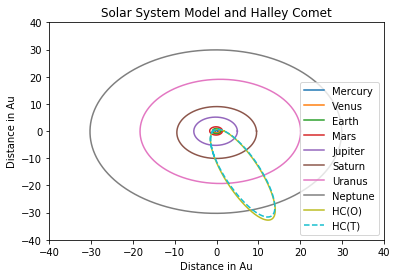

In [4]:
t=np.linspace(0,np.pi*2,10000)
Mercury_orbit=get_planet_orbit(Mercury,t)    #Planet Orbit with period of 2pi
Venus_orbit=get_planet_orbit(Venus,t)
Earth_orbit=get_planet_orbit(Earth,t)
Mars_orbit=get_planet_orbit(Mars,t)
Jupiter_orbit=get_planet_orbit(Jupiter,t)
Saturn_orbit=get_planet_orbit(Saturn,t)
Uranus_orbit=get_planet_orbit(Uranus,t)
Neptune_orbit=get_planet_orbit(Neptune,t) 
plt.plot(Mercury_orbit[0], Mercury_orbit[1], label='Mercury') #Plotting All Orbits
plt.plot(Venus_orbit[0],Venus_orbit[1],label='Venus')
plt.plot(Earth_orbit[0],Earth_orbit[1], label='Earth')
plt.plot(Mars_orbit[0],Mars_orbit[1], label='Mars')
plt.plot(Jupiter_orbit[0],Jupiter_orbit[1], label='Jupiter')
plt.plot(Saturn_orbit[0],Saturn_orbit[1], label='Saturn')
plt.plot(Uranus_orbit[0],Uranus_orbit[1], label='Uranus')
plt.plot(Neptune_orbit[0],Neptune_orbit[1], label='Neptune')
plt.title('Solar System Model and Halley Comet')
plt.xlabel('Distance in Au')
plt.ylabel('Distance in Au')



Halley1=(0,17.834,0.96714,111.33*(np.pi/180),(111.33*np.pi/180)) #Mass of Halley is a dummy variable  
Halley_orbit=get_planet_orbit(Halley1,t)
plt.plot(Halley_orbit[0],Halley_orbit[1], label='HC(O)') #Orbital Halley's Comet
planet2=[Mercury,Venus,Earth,Mars,Jupiter,Saturn,Uranus,Neptune]
H_p=get_planet_coords(Halley1)
d_phi1=update_planet_position(Halley1,1)[3]  
V_H=(d_phi1-Halley1[3])    #Linear Velocity for Halley
rad=get_planet_r(Halley1) 
x_h=-rad*V_H*np.sin(Halley1[3])
y_h=rad*V_H*np.cos(Halley1[3])
vH_v=np.array([x_h,y_h,0])


t2= (np.linspace(0, 75*365,200000) * u.day).to_value('s') 
H_t=find_trajectory(H_p, vH_v, planet2,t2)
plt.plot(H_t[0][0],H_t[0][1],linestyle='--',label='HC(T)') #Trajectory of Halley's Comet
plt.xlim(-40,40)
plt.ylim(-40,40)
plt.legend(loc='lower right')


### 2. Stability of Pluto's orbit

Treat Pluto as a test mass; show that you can recover an elliptical orbit for Pluto using the main simulation loop (you can find an initial position and velocity from the orbital parameters given.)  How sensitive is the orbit of Pluto to the initial conditions (position and speed)?  More specifically, how much do you have to change the initial position or initial speed to destabilize Pluto's orbit and send it flying out of the Solar System?

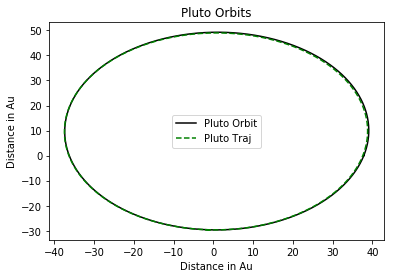

In [5]:
Pluto=(1.309e22 , 39.48211675, 0.24882730,265.9093415*(np.pi/180),224.06891629*(np.pi/180)+(np.pi/4.4))

Pluto_orbit=get_planet_orbit(Pluto,t)
plt.plot(Pluto_orbit[0],Pluto_orbit[1],label='Pluto Orbit', color='black') #Pluto Orbit Plot
Pluto_position=get_planet_coords(Pluto)
Pluto_phi2=update_planet_position(Pluto,1)[3]   #Another Phi position for Pluto
V_Pluto=(Pluto_phi2-Pluto[3])       #Angular Velocity of Pluto
Pluto_rad=get_planet_r(Pluto)

x_Pluto_v=-Pluto_rad*V_Pluto*np.sin(Pluto[3])   #Transformation from Angular Velocity to Linear Velocity
y_Pluto_v=Pluto_rad*V_Pluto*np.cos(Pluto[3])
v_Pluto=np.array([x_Pluto_v,y_Pluto_v,0])


t_Pluto= (np.linspace(0, 248*365,20000) * u.day).to_value('s')     #Time of Pluto Orbit is 248 years 
Pluto_traj=find_trajectory(Pluto_position, v_Pluto, planet2,t_Pluto)         #Pluto Trajectory Function
plt.plot(Pluto_traj[0][0],Pluto_traj[0][1], label='Pluto Traj', linestyle='--',color='green')  #Plot of Pluto Trajecctory
plt.title('Pluto Orbits')
plt.xlabel('Distance in Au')
plt.ylabel('Distance in Au')
plt.legend()


For Pluto I used the same method as Halley's Comet but I had to adjust the omega value to shift plutos orbit to match the get_planet_orbit solution. Yes, Pluto's Orbit is sensitive to position because it goes off orbit if it is off by a small position. Pluto's velocity can be half a percent higher and it will not be able to complete the orbit. To make Pluto shoot off, the velocity will need to be increased by 3 percent.

### 3. Closest approach: 'Oumuamua and comets

The first officially recorded interstellar object seen in our solar system is 1I/2017 U1, also known as ['Oumuamua](https://en.wikipedia.org/wiki/ʻOumuamua).  Using the orbital parameters provided above to find an initial position/speed, use your simulation to compute the motion of 'Oumuamua through our solar system.  What was its distance of closest approach to each of the four inner planets (Mercury through Mars)?

The Oort cloud, surrounding our solar system, is full of comets which occasionally pass near the Sun and inner planets.  The file `comets.csv` contains data on 200 hypothetical comets, traveling towards the sun at an initial distance of 30-40 AU and initial speeds of around 6-7 km/s.  Each line contains the initial parameters for one comet, in our coordinates, in the following comma-separated format:

```
(comet #),(x0),(y0),(z0),(vx_0),(vy_0),(vz_0)
```

For each comet, find and record any __close approach__ to any of the eight planets over the next 40 years of its orbit, defining a close approach to be passing within 0.1 AU of any planet. (This isn't _that_ close: for reference, the Moon is only about 0.003 AU from the Earth.  But the cost of simulation increases rapidly as we make the timestep small enough to resolve small fractions of an AU!)

In [6]:
#Cell Takes a while to Run

with open('comets.csv') as data_file:     #Opened comet.csv file 
    lines=data_file.readlines()
    

Comet_array=[]    
for i in range(len(lines)):       #Iterated over lines to turn it into float
    x=parse_line_csv(lines[i])
    Comet_array.append(x)

    
Comet_position=[]       #Velocity and Position list
Comet_velocity=[]    
for i in range(len(Comet_array)):                            #Iterated over every Comet to get position and velocity array     
    x=Comet_array[i][1],Comet_array[i][2],Comet_array[i][3]
    y=Comet_array[i][4]*6.68459e-9, Comet_array[i][5]*6.68459e-9, Comet_array[i][6]*6.68459e-9
    Comet_position.append(x)
    Comet_velocity.append(y)
    


h=0
for i in range(len(Comet_array)):                                         #Iterated over 200 comet positions and velcoities 
    planet2=[Mercury,Venus,Earth,Mars,Jupiter,Saturn,Uranus,Neptune]
    t2= (np.linspace(0, 40*365,10000) * u.day).to_value('s')
    Traj,Planet_distance=find_trajectory(Comet_position[i],Comet_velocity[i],planet2,t2)
    if np.any(Planet_distance<=0.1):      #Used if statement to find if the comet distance is within 0.1 Au
        h+=1
        print('Total number of Comets {}'.format(h),'Comet # {}'.format(i))
    

Total number of Comets 1 Comet # 2
Total number of Comets 2 Comet # 6
Total number of Comets 3 Comet # 9
Total number of Comets 4 Comet # 16
Total number of Comets 5 Comet # 19
Total number of Comets 6 Comet # 21
Total number of Comets 7 Comet # 23
Total number of Comets 8 Comet # 25
Total number of Comets 9 Comet # 27
Total number of Comets 10 Comet # 29
Total number of Comets 11 Comet # 31
Total number of Comets 12 Comet # 32
Total number of Comets 13 Comet # 40
Total number of Comets 14 Comet # 47
Total number of Comets 15 Comet # 57
Total number of Comets 16 Comet # 59
Total number of Comets 17 Comet # 61
Total number of Comets 18 Comet # 63
Total number of Comets 19 Comet # 64
Total number of Comets 20 Comet # 67
Total number of Comets 21 Comet # 71
Total number of Comets 22 Comet # 76
Total number of Comets 23 Comet # 85
Total number of Comets 24 Comet # 93
Total number of Comets 25 Comet # 95
Total number of Comets 26 Comet # 99
Total number of Comets 27 Comet # 106
Total number

From my code, I found 40 comets will be within 0.1 AU of any planet. If I change the time step it will change the amount of comets because we are dealing with more points, but it will take a long time to run the code. 

### 4. [Extra-credit challenge!] Simulating the Trojan asteroids

Between two massive bodies, there exist points of equilibrium called __Lagrange points__ where the forces of gravity balance, and a third small object can remain in position.  There are five such points, some of which are stable to small perturbations.  The Lagrange point L4 of Jupiter famously has a large collection of asteroids, the __Trojan asteroids__.

Using your simulation, find a stable "orbit" for an object around Jupiter's L4 Lagrange point.  Your orbit should be stable over a timescale of 100 years, and the object has to be in motion relative to the Lagrange point.  (Of course, your first task is just to _find_ the Lagrange point, so starting with objects at rest might be helpful.)